In [1]:
using Pkg
Pkg.activate("../Project.toml")

using Images
using Interpolations

┌ Info: activating new environment at /media/shreyas/Data/GSoC/pix2pix/Project.toml.
└ @ Pkg.API /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.1/Pkg/src/API.jl:519
┌ Info: Recompiling stale cache file /home/shreyas/.julia/compiled/v1.1/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1184


┌ Info: Recompiling stale cache file /home/shreyas/.julia/compiled/v1.1/ImageMagick/0LbNX.ji for ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1184


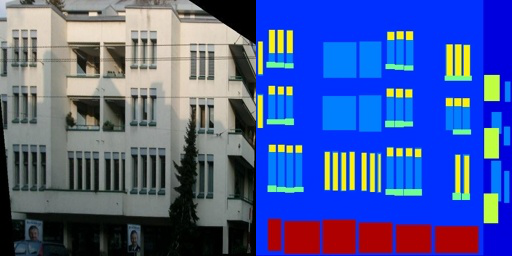

In [2]:
img = load("../data/train/1.jpg")

In [39]:
function random_crop(imgA,imgB,scale=256)
    W,H = size(imgA) # We have W = H
    diff = W - scale
    i = rand(1:diff)
    
    return imgA[i:i+scale-1,i:i+scale-1],imgB[i:i+scale-1,i:i+scale-1]
end

random_crop (generic function with 3 methods)

In [41]:
function random_jitter(img;RESIZE_SCALE = 286)
    A,B = img[:,1:256],img[:,257:end]
    
    A = imresize(A,(RESIZE_SCALE,RESIZE_SCALE))
    B = imresize(B,(RESIZE_SCALE,RESIZE_SCALE))
    
    A,B = random_crop(A,B)
    return cat(A,B,dims=2)
end

random_jitter (generic function with 1 method)

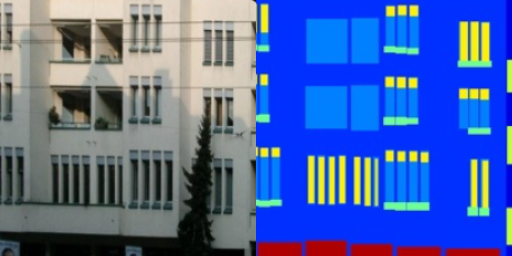

In [50]:
random_jitter(img)